# SNLP Assignment 6

Name 1: Entang Wang<br>
Student id 1: 7069521<br>
Email 1: enwa00001@stud.uni-saarland.de<br>

Name 2: Zichao Wei<br>
Student id 2: 7063941<br>
Email 2: ziwe00001@stud.uni-saarland.de<br>

Name 3: Xiao Wang<br>
Student id 3: 7039023<br>
Email 3: xiwa00004@stud.uni-saarland.de<br>

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the respective Python files for any additional exercises necessary. There is no need to submit the data files should they exist. <br>

Upload the zipped folder on CMS. Please follow the naming convention of **Name1_studentID1_Name2_studentID2_Name3_studentID3.zip**. Only one member of the group should make the submisssion.

---

### General guidelines:
1. Don't change the layout of the notebook, especially the final output cells. If you do end up changing the code, add comments to tell us why you needed to do it.
2. Use log with base 2 wherever you feel logarithimic operations are necessary. If you do use other bases, please specify it and explain why.
3. For tokenizers, it is sufficient to use tokenizers from `nltk` library.
4. For the theoritical questions where no math is involved, it is sufficient to answer the questions with 3-4 sentences. Do not be too verbose.

---

There are many different ways to smooth language models for managing OOV words. In this assignment, we will be looking at some of these smoothing methods. 

In [1]:
import matplotlib as plt
from matplotlib import pyplot as plt
import numpy as np

from importlib import reload
from tqdm import tqdm ##install tqdm if not available

## Exercise 6.3:  Implement an Interpolated N-gram Model: 

1. In the provided `exercise_3.py` file, you are required to implement an interpolated n-gram model that uses        
   add-$\alpha$ smoothing. For this exercise, we are using **Penn-Treebank corpus** present in the `nltk` library. Here are the specific steps you need to implement:                                               (**Total**: 1.5 points)

    - `load_and_preprocess_data`: provided to you. 
    - `make_vocab`: fill in the function to create a vocabulary for our language models. (0.25 points)
    - `restrict_vocab`: fill in the function to restrict the corpus to fit inside the vocabulary using <unk> for OOV words. (0.25 points)
    - `train_test_split`: split the corpus into train and test sets. This is for the next exercise. (0.25 points)

    - `Interpolated_Model` class: We have defined a class `Interpolated_Model` for you. It is intilialized with values $\alpha = 0$, n=2 i.e. bigrams, interpolation weight = $\frac{1}{n}$. This class should have methods for initializing the model, calculating Laplace smoothed probabilities, calculating interpolated log probabilities, getting n-grams, and calculating perplexity on the test set. The codes for preparing the corpus are already there. Your job is to complete the following functions :
        - `_get_n_grams`: provided to you.
        - `laplace_prob`: return the log proabability of an ngram. Adjust this function for (add-$\alpha$) Smoothing. (0.25 poimts)
        - `interpolated_logprob`: return the log proabability of the interpolated ngram model. This should be using the add-$\alpha$ smoothed probabilites. (0.25 poimts)
        - `perplexity`: calculates the perplexity of the model on the test sentences. (0.25 points)

    Once complete, run it on the supplied parameters ($\alpha = 0.0001$ and $n=3$) and report the perplexity.


In [3]:
# Import the necessary module
import exercise_3

# Reload the module to reflect any changes made to the file
exercise_3 = reload(exercise_3)

# Load and preprocess the data. The maximum n-gram order is set to 10.
corpus = exercise_3.load_and_preprocess_data(max_ngram_order=10)

# Split the corpus into training and testing sets. The split is 70:30 and the test set is taken from the last 30% of the corpus.
# Note: The data is not randomized at this stage.
train, test = exercise_3.train_test_split(corpus, split=0.7)

# Create the vocabulary from the training set. The vocabulary consists of the top 5000 most frequent words.
vocab = exercise_3.make_vocab(train, 5000)

# Restrict the vocabulary of the training and testing sets. Words not in the vocabulary are replaced with '<unk>'.
vocabulary_restricted_train = exercise_3.restrict_vocab(train, vocab)
vocabulary_restricted_test = exercise_3.restrict_vocab(test, vocab)

# Initialize the Interpolated_Model class with the vocabulary-restricted training and testing sets.
# The smoothing factor alpha is set to 0.0001 and the n-gram order is set to 3.
# Note: If you want to increase the n-gram order higher than 10, you will need to edit the load_and_preprocess_data() function.

n_order = 3
alpha_val = 0.0001
interpolated_model = exercise_3.Interpolated_Model(train_sents=vocabulary_restricted_train, test_sents=vocabulary_restricted_test, alpha= alpha_val, order= n_order)

# Calculate and print the perplexity of the model.
print(f"Perplexity of interpolated model with alpha {alpha_val} and n-gram order {n_order}: {interpolated_model.perplexity()}")


[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\WangEntang\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


Perplexity of interpolated model with alpha 0.0001 and n-gram order 3: 1156.6024346011839


2. **Hyperparameter Tuning**: (1 point)

    After implementing the interpolated n-gram model, you need to find the optimal n-gram order using 5-fold cross-validation. You need to find the optimal $n$ from the provided selection here: {1,2,3,4,5}

    Perform 5-fold cross validation and find the optimal values. Plot the perplexity against the hyperparameter values ($\alpha$ and n-gram order) to show the reasoning behind your choice. Set $\alpha$ = 0.0001 for this operation.

N-gram order: 100%|██████████| 5/5 [01:06<00:00, 13.32s/it] 


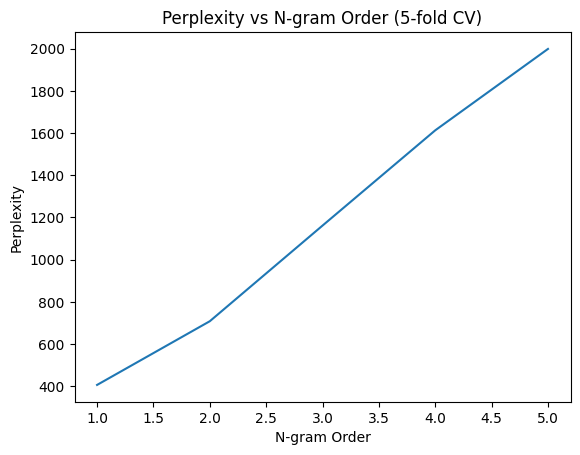

The optimal n-gram order is 1 with a perplexity of 406.04626137072006


In [7]:
### NOTE: This code block may take some time to run. For me, it took 10 minutes

num_folds = 5
fold_size = len(corpus) // num_folds
ppl_per_order = []

for ngram_ in tqdm(range(1, 6), desc="N-gram order"):
    fold_ppls = []
    for fold in tqdm(range(num_folds), desc=f"Folds for n={ngram_}", leave=False):
        # Split indices for test and train
        test_start = fold * fold_size
        test_end = (fold + 1) * fold_size if fold < num_folds - 1 else len(corpus)
        test_indices = list(range(test_start, test_end))
        train_indices = [i for i in range(len(corpus)) if i not in test_indices]
        
        train = [corpus[i] for i in train_indices]
        test = [corpus[i] for i in test_indices]
        
        vocab = exercise_3.make_vocab(train, 5000)
        vocabulary_restricted_train = exercise_3.restrict_vocab(train, vocab)
        vocabulary_restricted_test = exercise_3.restrict_vocab(test, vocab)
        
        interpolated_model = exercise_3.Interpolated_Model(
            train_sents=vocabulary_restricted_train,
            test_sents=vocabulary_restricted_test,
            alpha=0.0001,
            order=ngram_
        )
        fold_ppls.append(interpolated_model.perplexity())
    ppl_per_order.append(np.mean(fold_ppls))

plt.plot(range(1, 6), ppl_per_order)
plt.xlabel('N-gram Order')
plt.ylabel('Perplexity')
plt.title('Perplexity vs N-gram Order (5-fold CV)')
plt.show()

optimal_index = np.argmin(ppl_per_order)
optimal_order = list(range(1, 10))[optimal_index]
optimal_perplexity = ppl_per_order[optimal_index]

print(f"The optimal n-gram order is {optimal_order} with a perplexity of {optimal_perplexity}")

---

## Exercise 6.4: Kneser-Ney vs the World

In this exercise, you'll implement different smoothing techniques for a trigram language model and compare their behavior using text from **alice_in_wonderland.txt**. The goal is to understand why advanced smoothing methods like Kneser-Ney often outperform simpler approaches. Here's what you need to implement in `exercise_4.py`: (**Total**: 4.5 points)

1. `preprocess_text`: Preprocess the text by first removing all punctuation and newlines, lowercasing, and then tokenisation. There is no need to split the data into train and test sets. Replace rare words with counts lower than a given threshold. (0.5 points)

2. `SmoothingCounter` class: A class for n-gram language modeling that provides both Kneser-Ney and add-alpha (Laplace) smoothing for bigram and trigram probabilities. The initialization should include the discounting param `d`. Set it to $0.75$. It is recoemmended to set up Counters for tracking unigram/bigram/trigram counts here. (0.5 points)

3. `prob_good_turing_bigram` & `prob_good_turing_trigram`: Compute Good-Turing smoothed probabilities for bigrams and trigrams. (1 point)

4. `knprob_bigram` & `knprob_trigram`: Functions that calculate the bigram ($P_{KN}(w_3|w_2)$) and trigram probability ($P_{KN}(w_3|w_2,w_1)$) using the equations from Exercise 6.2. (0.5 point)

5. `prob_alpha_bigram` & `prob_alpha_trigram`: Functions that calculate the log prob of a bigram and trigram with counts adjusted for add-$\alpha$ smoothing. (0.5 points)

Now, using these, consider the trigrams: (1 point)
   - "alice said nothing"
   - "alice said nichts".

   For these trigrams, use your newly defined functions to calculate the smoothed bigram and trigram probabilities $P_{KN}(nothing|said)$ ,$P_{KN}(nichts|said)$, $P_{KN}(nothing|said,alice)$ and $P_{KN}(nichts|said,alice)$.<br>
   Also complete the functions to find the same bigram and trigram probabilites using add-$\alpha$ smoothing. Set the $\alpha = 0.5$.

**NOTE**: 
1. For Good-Turing, refresh your understanding of how it works from this [video](https://www.youtube.com/watch?v=GwP8gKa-ij8&t=2s).
2. You are free to add extra helper functions to the `SmoothingCounter` class, but provide detailed comments on what those functions are doing. 
2. Don't forget to answer the given question at the end.

In [8]:
from importlib import reload
import exercise_4
exercise_4 = reload(exercise_4)

file = open("data/alice_in_wonderland.txt", "r")
text = file.read()

import exercise_3
exercise_3 = reload(exercise_3)

tokens = exercise_4.preprocess_text(text)

[nltk_data] Downloading package treebank to
[nltk_data]     /Users/wangxiao/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [9]:
model_kn = exercise_4.SmoothingCounter(tokens, alpha=0)      
model_alpha = exercise_4.SmoothingCounter(tokens, alpha=0.5)

trigram1 = ("alice", "said", "nothing")
trigram2 = ("alice", "said", "nichts")

print(f"{trigram1} Probs with KN-smoothing: {model_kn.knprob_trigram(trigram1)}")
print(f"{trigram1} Probs with alpha-smoothing: {model_alpha.prob_alpha_trigram(trigram1)}")
print(f"{trigram1} Probs with Good-Turing smoothing: {model_kn.prob_good_turing_trigram(trigram1)}")
print()
print(f"{trigram2} Probs with KN-smoothing: {model_kn.knprob_trigram(trigram2)}")
print(f"{trigram2} Probs with alpha-smoothing: {model_alpha.prob_alpha_trigram(trigram2)}")
print(f"{trigram2} Probs with Good-Turing smoothing: {model_kn.prob_good_turing_trigram(trigram2)}")

('alice', 'said', 'nothing') Probs with KN-smoothing: 0.13142678219902237
('alice', 'said', 'nothing') Probs with alpha-smoothing: 0.001222792858889704
('alice', 'said', 'nothing') Probs with Good-Turing smoothing: 0.07796791443850268

('alice', 'said', 'nichts') Probs with KN-smoothing: 0.0
('alice', 'said', 'nichts') Probs with alpha-smoothing: 0.00024455857177794083
('alice', 'said', 'nichts') Probs with Good-Turing smoothing: 0.08490527767636201


In [10]:
model_kn = exercise_4.SmoothingCounter(tokens, alpha=0)  
model_alpha =  exercise_4.SmoothingCounter(tokens, alpha=0.5)

bigram1 = ("said", "nothing")
bigram2 = ("said", "nichts") 

print(f"{bigram1} Probs with KN-smoothing: {model_kn.knprob_bigram(bigram1)}")
print(f"{bigram1} Probs with alpha-smoothing: {model_alpha.prob_alpha_bigram(bigram1)}")
print(f"{bigram1} Probs with Good-Turing smoothing: {model_kn.prob_good_turing_bigram(bigram1)}")
print()
print(f"{bigram2} Probs with KN-smoothing: {model_kn.knprob_bigram(bigram2)}")
print(f"{bigram2} Probs with alpha-smoothing: {model_alpha.prob_alpha_bigram(bigram2)}")
print(f"{bigram2} Probs with Good-Turing smoothing: {model_kn.prob_good_turing_bigram(bigram2)}")

('said', 'nothing') Probs with KN-smoothing: 0.012241489902899737
('said', 'nothing') Probs with alpha-smoothing: 0.0026321117635148814
('said', 'nothing') Probs with Good-Turing smoothing: 0.010057471264367816

('said', 'nichts') Probs with KN-smoothing: 0.0
('said', 'nichts') Probs with alpha-smoothing: 0.00020247013565499088
('said', 'nichts') Probs with Good-Turing smoothing: 0.0011943727957536726


**Q**. What can you conclude from these results? Can you provide an explanation why this is happening? (0.5 points)

**A**: 
- Kneser-Ney smoothing performs best by assigning zero probability to unseen words like "nichts" while giving higher probability to actual patterns like "alice said nothing".
- Add-alpha smoothing treats all unseen n-grams uniformly, giving non-zero probability to impossible sequences without considering the context.
- Good-Turing smoothing assigns probabilities by giving higher probabilities to some unseen sequences than observed ones, which is uncommon in real examples.